In [ ]:
## Go to dataset ->> https://huggingface.co/datasets/Alibaba-Apsara/Superior-Reasoning-SFT-gpt-oss-120b
## Copy the Pandas code !

In [ ]:
'''

The Superior-Reasoning-SFT-gpt-oss-120b dataset is a high-quality, open-source collection containing 435K samples 

'''

In [ ]:
## Run this Project on data_analysis env ""

In [ ]:
'''

🧠 Why THIS Order Works :

1️⃣ WHY first
    Start with WHY we are solving this project ! Preview dashboard here at 67 or 75% (This reduces beginner anxiety) !
    Business problem first = purpose

2️⃣ HOW (data loading)
    ie "Collecting / Loading ChatGPT Data"
    Load data, understand columns


3️⃣ WHAT users ask
    ie "Understand What People Ask ChatGPT Most Often"
    Natural curiosity driver

4️⃣ HOW they ask
    ie "Analyse Most Common Prompt Types in ChatGPT"
    Prompt types, patterns

5️⃣ HOW ChatGPT responds
    ie "Are ChatGPT Answers Easy or Complex?"
    Complexity & readability

6️⃣ Then RELATIONSHIPS "Do Bigger Prompts Produce Easier or Longer Answers?"
    Prompt size vs response behavior

7️⃣ How Verbose Are ChatGPT Responses ?

8️⃣ Then COMPARISON "Does Additional Context Improve ChatGPT Responses?"
    Context vs no context (advanced but intuitive)


9️⃣ End with STORYTELLING "Building Dashboard"
    Dashboard = confidence + closure


'''

# 1.. Introduction to Business Problem & data!

# 2.. Collecting ChatGPT data

In [ ]:
'''

we are going to consider this data from Huggingface !
By the way , HuggingFace is a Github of AI models for those of you,  who dont know !

Just do simple sign-in & u can access this data !

'''

## Dataset Source : 
    https://huggingface.co/datasets/vicgalle/alpaca-gpt4

In [ ]:
## Go on use this dataset ->> Click on Pandas , it will give u all the code !

In [ ]:
'''

import pandas as pd

df = pd.read_parquet(r"hf://datasets/vicgalle/alpaca-gpt4/data/train-00000-of-00001-6ef3991c06080e14.parquet")


'''

In [ ]:
'''

Its a parquet file , now u may ask what is ParQuet file ?

Parquet is a file format which store tables of data in a smart, compressed way.

'''

In [ ]:
'''

# CSV saves data row by row like this:

Name,Age,City,Salary
Amit,25,Mumbai,50000
Sara,30,Delhi,60000
John,28,Pune,55000



🧠 Parquet Stores Data Column by Column
Same data in Parquet style looks more like this internally:

Column: Name   → [Amit, Sara, John]
Column: Age    → [25, 30, 28]
Column: City   → [Mumbai, Delhi, Pune]
Column: Salary → [50000, 60000, 55000]


So instead of storing one row at a time:

Amit, 25, Mumbai, 50000
Sara, 30, Delhi, 60000

It stores column at a time:

    All Names together
    All Ages together
    All Cities together


If you ask for "salary column " , Parquet loads only the Salary column not the entire dataset..
CSV ❌ cannot do this — it must read everything.




🔍 Key Idea (Most Important)

CSV = Row-based storage
Parquet = Column-based storage
          (Parquet stores data column-wise in compressed blocks, 
          so computers can read only needed columns and process large datasets much faster.)




'''

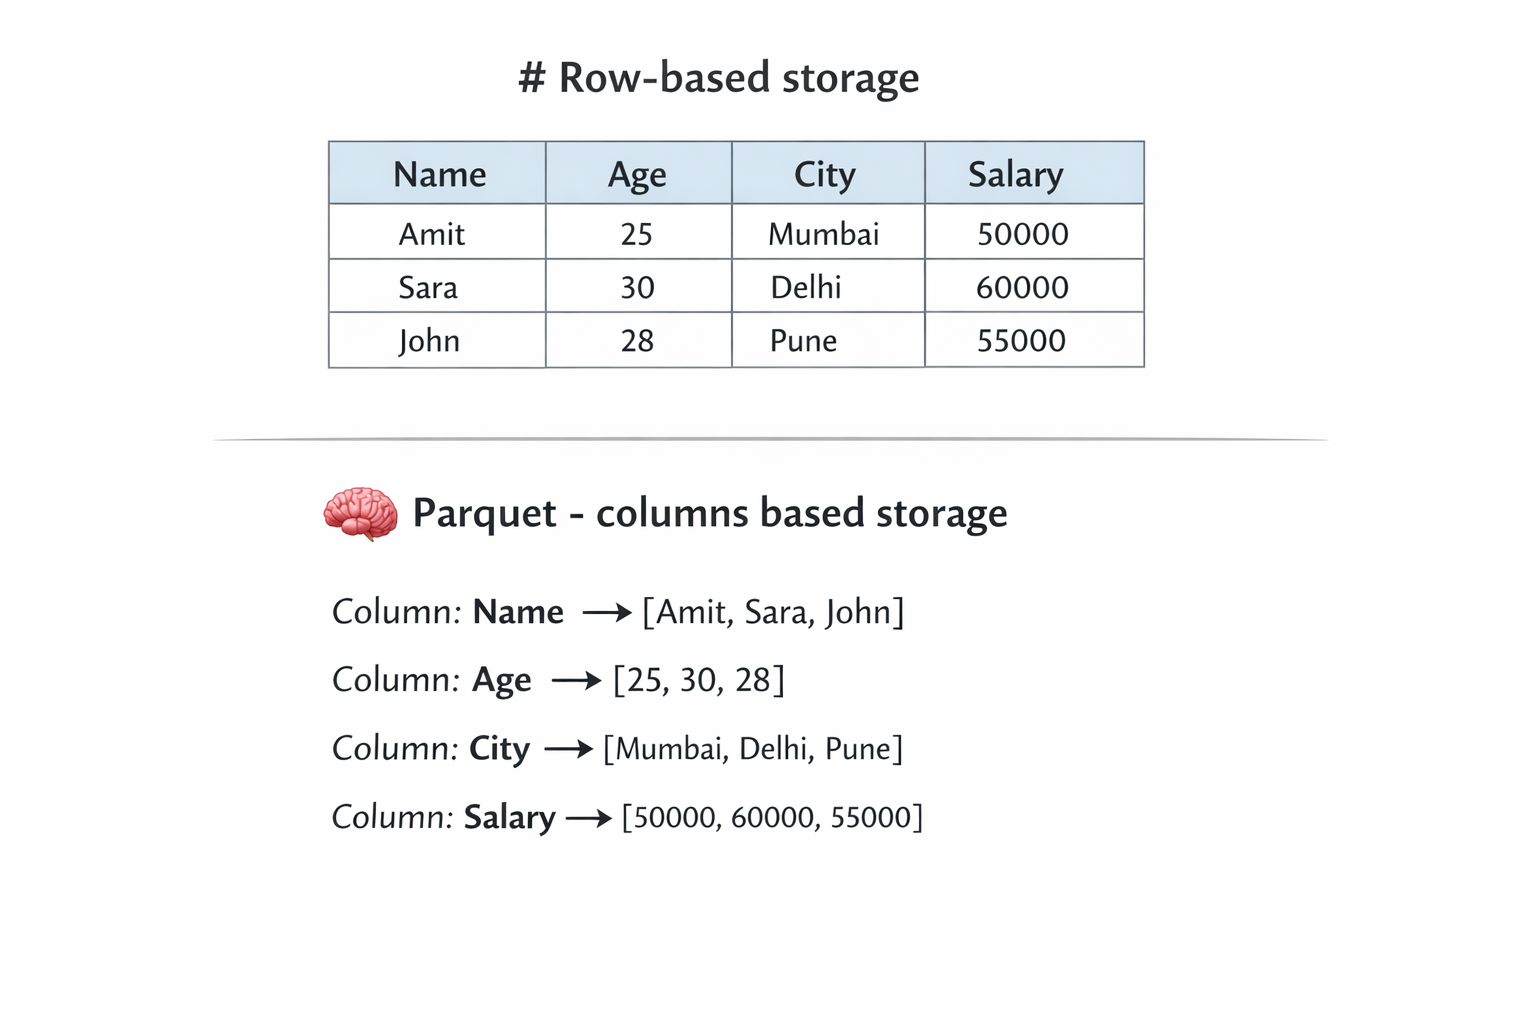

In [3]:
# !pip install pandas - 
# Successfully installed numpy-2.4.1 pandas-3.0.0

In [ ]:
'''

pandas require an engine like PyArrow to read and write Parquet files :
so say :

! pip install pyarrow == 15.0.2


'''

In [142]:
import pandas as pd

df = pd.read_parquet(r"hf://datasets/vicgalle/alpaca-gpt4/data/train-00000-of-00001-6ef3991c06080e14.parquet")


In [ ]:
## If u are getting any kind of error , u can read same data from your local PC !

In [144]:
df = pd.read_parquet(r"R:\All_Datasets\ChatGPT\Dataset/ChatGPT_data.parquet")

In [ ]:
'''


Windows uses '\' as a file separator
Mac uses '/' as a file separator

& this makes file structure so confusing !
So to get rid of any issues , it is good idea to append raw string before file path..

It means file path will be to understood to Pandas as it is !

'''

In [6]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
'''

dataframe is like a simple table which have rows , cols

In pandas , we have 2 types of data-structure :

    1-D known as Series ( Series is like a array or List)
    2-D known as Dataframe  , ( which is like simple excel data or tabular data )

'''

In [145]:
df.head(1)

,instruction,input,output,text
0,Give three tips for staying healthy.,None,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....


In [ ]:
'''

Alright , we have successfully loaded ChatGPT data , now in the next session , we will analyse 
"what do people ask CHATGPT most often" ?


'''

# 3.. What Do People Ask ChatGPT Most Often? 

In [ ]:
'''

In order to answer such ques , u need such a plot which is Wordcloud !

A WordCloud shows:

    Bigger words → appear more frequently
    Smaller words → appear less frequently

This helps us quickly understand what users talk about the most.



    Lets talk about insights :
    You will notice words like question, data, system, algorithm appearing very often.
    👉 This means most people use ChatGPT to ask questions and get explanations.

    You will also see words like story, poem, language, writing.
    👉 This shows many users use ChatGPT for learning and creative tasks.



'''

In [ ]:
### whenever u have to work with text data , thats where these Python packages exist : nltk , re !

In [ ]:
!pip install nltk
!pip install re

In [4]:
import nltk

In [ ]:
## nltk.download('stopwords')

In [12]:
from nltk.corpus import stopwords

## stopwords are those words[he , us , she , it , the] that will be useless in analysis !


In [ ]:
stop_words = stopwords.words("english")

In [14]:
len(stop_words)

198

In [16]:
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [18]:

custom_stopwords = [
    # Common instruction verbs
    'write','generate','create','give','list','describe','explain',
    'provide','make','find','identify','suggest','classify','rewrite',
    'summarize','compare','construct','edit',

    # Prompt structure words
    'following','given','using','based','text','sentence','sentences',
    'paragraph','article','statement','example','words','word','name',
    'phrase','output','input',

    # Generic verbs / fillers
    'use','used','way','come','make',

    # Generic adjectives
    'new','different','various','type','kind',

    # Numbers often used in prompts
    'one','two','three','four','five','first','second','third',
    '1','2','3','4','5','10','number','numbers'
]

stop_words.extend(custom_stopwords)

In [20]:
len(stop_words)

259

In [ ]:
df.columns

In [ ]:
df['instruction']

In [24]:
import re

In [ ]:
'''

"ChatGPT 4.0 is amazing!!!" ->>> "chatgpt  is amazing"

I need to clean like that so that we make insights !

text = str(text).lower() 
## first apply lowercase() to make sure words like "ChatGPT" & "chatgpt"  treated as same

re.sub(r'[^a-z\s]', '', text) ## removes everything except letters and spaces from the text..

    a-z → keeps lowercase letters
    \s → keeps spaces
    [^ ] → except than a-z and \s , replace everything with nothing (ie delete that)
    '' → replace with nothing (delete)

'''

In [25]:
import re

def clean_text(text):
    text = str(text).lower() 
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation & numbers
    return text

In [26]:
cleaned_text = df['instruction'].dropna().apply(clean_text)

In [27]:
cleaned_text

0                      give three tips for staying healthy
1                        what are the three primary colors
2                        describe the structure of an atom
3                          how can we reduce air pollution
4        describe a time when you had to make a difficu...
                               ...                        
51997    generate an example of what a resume should li...
51998    arrange the items given below in the order to ...
51999    write an introductory paragraph about a famous...
52000    generate a list of five things one should keep...
52001    analyze the given legal document and explain t...
Name: instruction, Length: 52002, dtype: object

In [ ]:
## now we need entire data in a string so that wordcloud can accept that data !

In [43]:
type(cleaned_text)

pandas.core.series.Series

In [38]:
all_text = " ".join(cleaned_text)

## In order to convert series into string , thats where join() of Python comes !

In [ ]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud

In [122]:
wordcloud = WordCloud(
    width = 1200, ## width of wordcloud !
    height = 600, #3 height of wordcloud 
    stopwords = stop_words,
    max_words=200 ## top 50 words I want to show !
).generate(all_text)

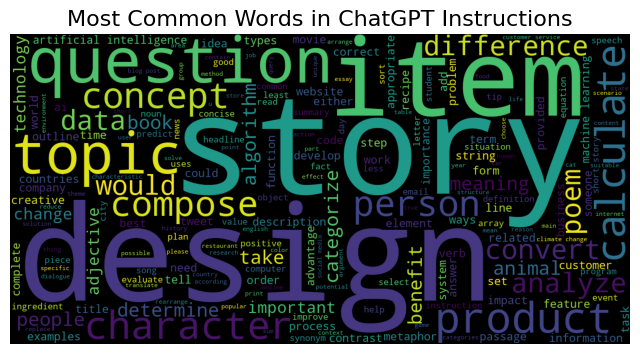

In [123]:
plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Common Words in ChatGPT Instructions", fontsize=16)
plt.show()


In [ ]:
'''

“This WordCloud shows the core intent words users use when interacting with ChatGPT
  
    
    
    

    “If you are having some other words which surprised you the most !
    Do Share your results in QnA & we would love to answer that !


    This keeps learners thinking, not just coding..
    
   

'''

# 4.. Analyse Most Common Prompt Types in ChatGPT

In [ ]:
df.head(1)

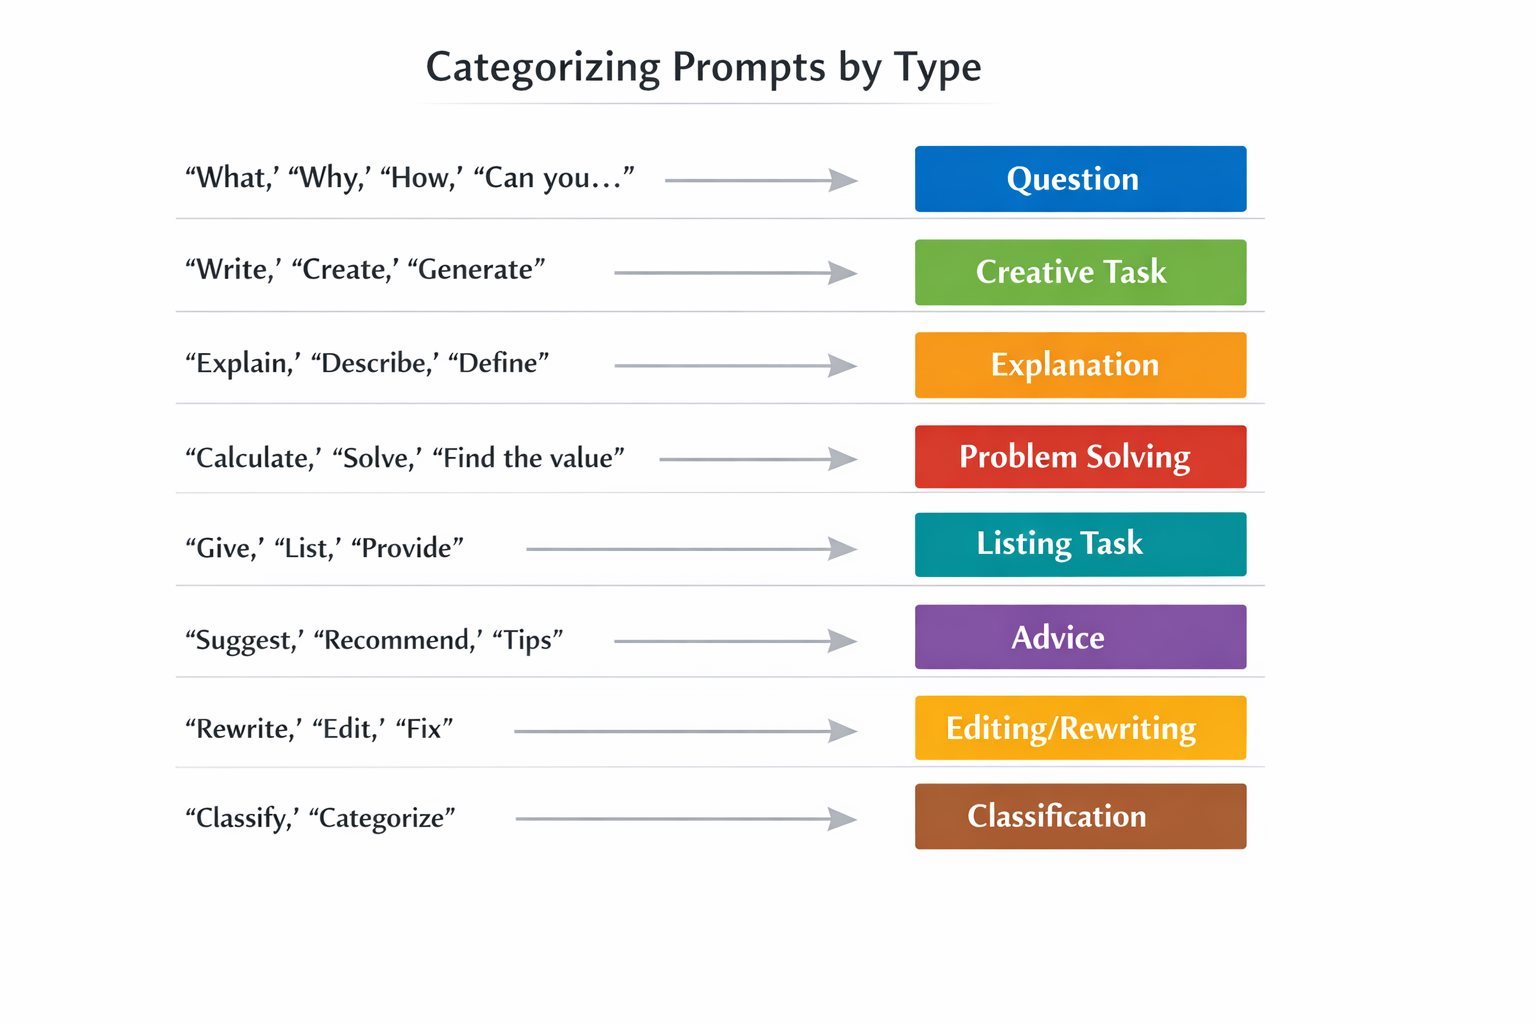

In [13]:
df.head(1)

,instruction,input,output,text
0,Give three tips for staying healthy.,None,1. Eat a balanced and nutritious diet: Make su...,Below is an instruction that describes a task....


In [114]:

def categorize_prompt(text):
    
    text_lower = text.lower()
    

    # If text contains any of these "interrogatuve words" , categorize it as question 
    if text_lower.startswith(('what', 'why', 'how' , 'when' , 'where' , 'who' , 'which', 'whom')):
        return 'Question'
    
    
    # Questions phrased indirectly !

    if text_lower.startswith(('can you' , 'could you' , 'would you' , 'do you' , 'did you' , 'is it' , 'are there' , 
                              'should i')):
        return 'Question'
    
    elif text_lower.startswith(('write', 'create', 'generate' , 'compose' , 'draft')):
        return 'Creative Task'
                             
    elif text_lower.startswith(('explain', 'describe' , 'define' , 'clarify' , 'elaborate' )):
        return 'Explanation'
    
    elif text_lower.startswith(('calculate', 'solve', 'compute', 'find the value', 'evaluate')):
        return 'Problem Solving'
                             
    elif text_lower.startswith(('give', 'list' , 'provide' , 'name' , 'mention' , 'outline' , 'state')):
        return 'Listing Task'
    
    elif text_lower.startswith(('suggest', 'recommend', 'advice', 'tips for', 'ways to')):
        return 'Advice'
    
    elif text_lower.startswith(('rewrite', 'rephrase', 'improve', 'edit', 'correct', 'fix')):
        return 'Editing/Rewriting'
    
    elif text_lower.startswith(('classify', 'categorize', 'group the following', 'label the following')):
        return 'Classification'
    
    else :
        return 'Other'



In [148]:
df['instruction'] = df['instruction'].str.strip() ## remove any "extra space u have so that u can apply function"

In [149]:
df['prompt_type'] = df['instruction'].apply(categorize_prompt)

In [ ]:
df.head(1)

In [ ]:
df.columns

In [150]:
df[['instruction' , 'prompt_type']]

,instruction,prompt_type
0,Give three tips for staying healthy.,Listing Task
1,What are the three primary colors?,Question
2,Describe the structure of an atom.,Explanation


In [151]:
df['prompt_type'].value_counts()

prompt_type
Other                18770
Creative Task        11877
Listing Task          7328
Explanation           5066
Question              3686
Editing/Rewriting     1980
Classification        1389
Advice                1122
Problem Solving        784
Name: count, dtype: int64

<Axes: xlabel='prompt_type'>

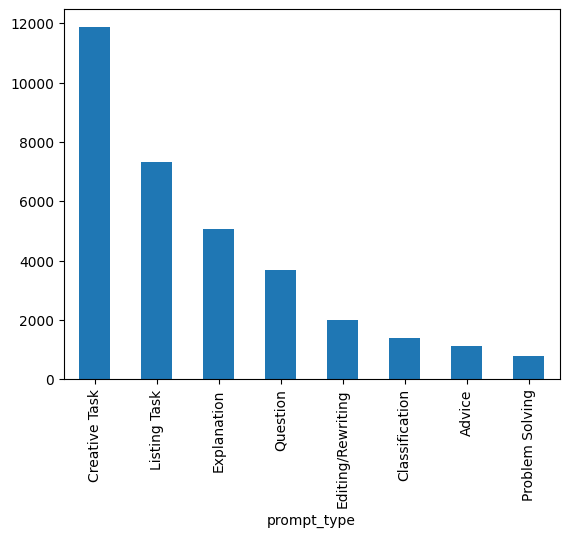

In [152]:
df['prompt_type'].value_counts()[1:].plot(kind = "bar")

In [ ]:
## !pip install plotly

In [ ]:
# !pip install plotly==5.18.0

In [153]:
import plotly.express as px

In [154]:
prompt_counts = df['prompt_type'].value_counts()[1:].reset_index()
prompt_counts.columns = ['Prompt Type', 'Count']

In [155]:
px.bar(prompt_counts , x = "Prompt type" , y = "Count" , 
      title = "Distribution of ChatGPT Prompt Types")

# 5.. Are ChatGPT Answers Easy or Complex ?

In [ ]:
# !pip install textstat

## 0.7.12
## Successfully installed click-8.3.1 joblib-1.5.3 nltk-3.9.2 pyphen-0.17.2 regex-2026.1.15 textstat-0.7.12 tqdm-4.67.1

In [156]:
import textstat

In [ ]:
'''

First , we need Calculate Readability Scores for ChatGPT Outputs : which shows how simple chatgpt response is 

'''

In [157]:
df["output"][0]

'1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.\n\n2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.\n\n3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports healthy growth and immune function. Aim for 7-9 hours of sleep each night.'

In [158]:
textstat.flesch_reading_ease(df["output"][0])

50.85363636363638

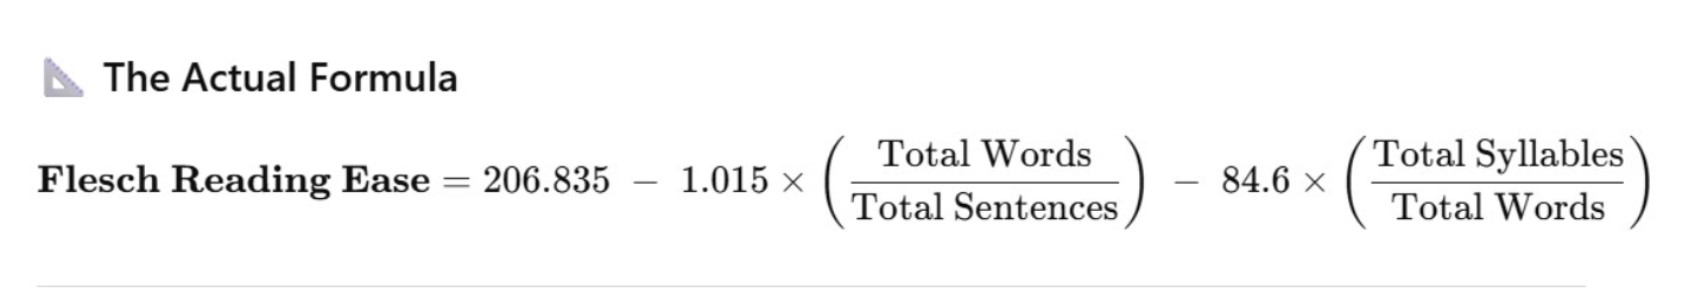

In [ ]:
'''

It uses Flesch Reading Ease formula to compute this value :


Imagine You ask : What is Data Analytics ?
ChatGPT gives this answer : “Data Analytics is about make insights out of data”

    ✅ Counts

    Words: 9
    Sentences: 1
    Syllables: 16

    Plugging into formula → Score will be high


    How Syllabus =  16 ? 
    A syllable is a single sound beat, not letters.

    Word-wise breakdown

Data → Da-ta → 2
Analytics → A-na-ly-tics → 4
is → is → 1
about → a-bout → 2
make → make → 1
insights → in-sights → 2
out → out → 1
of → of → 1
data → da-ta → 2



'''

In [ ]:
'''

“This score tells us how easy ChatGPT answer is to read..
If the score is high, even a school student can understand it..
If the score is low or negative, the answer is more technical and complex.”


                     What It Means
90 – 100 - >   ChatGPT response is Very easy to read             it means even 5th grade student can understand 
60 – 90  - >   ChatGPT response is Easy to understand            Middle school students can understand
30 – 60  - >   ChatGPT response is Moderately difficult          High school students can understand
10 – 29  - >   ChatGPT response is Difficult to read             College-level readers are needed
0 – 9    - >   ChatGPT response is Very difficult                Highly educated adults can understand
Below 0  - >   ChatGPT response is Extremely complex language    highly Technical & research-level explaination



'''

In [24]:
df['output'].apply(textstat.flesch_reading_ease) ## takes 10-15 sec 

0        50.853636
1        58.012767
2        54.375837
3        39.731667
4        41.498571
           ...    
51997    -9.244632
51998    90.990000
51999    26.398984
52000    55.441284
52001    15.209565
Name: output, Length: 52002, dtype: float64

In [56]:
# Flesch Reading Ease (higher = easier to read)
df['flesch_score'] = df['output'].apply(textstat.flesch_reading_ease)


In [66]:
df[["output" , 'flesch_score']][0:6]

,output,flesch_score
0,1. Eat a balanced and nutritious diet: Make su...,50.853636
1,"The three primary colors are red, blue, and ye...",58.012767
2,An atom is the basic building block of all mat...,54.375837
3,There are several ways to reduce air pollution...,39.731667
4,"As an AI assistant, I do not have my own perso...",41.498571
5,The odd one out is Telegram. Twitter and Insta...,36.510000


In [57]:
avg_flesch = df['flesch_score'].mean()
avg_flesch

np.float64(49.08191788747337)

In [58]:
def readability_level(score):
    if score >= 90:
        return "Very Easy"
    elif score >= 60:
        return "Easy"
    elif score >= 30:
        return "Medium"
    elif score >= 10:
        return "Difficult"
    elif score >= 0:
        return "Very Difficult"
    else:
        return "Extremely Complex"


In [59]:
df['readability_level'] = df['flesch_score'].apply(readability_level)

In [ ]:
df['readibility_level']

In [ ]:
df.columns

In [62]:
px.pie(df , names = "readibility_level" , 
      title = "Readibility level of ChatGPT responses")

# 6.. Do Bigger Prompts Produce Easier or Longer Answers?

In [1]:
'''

Show example on chatgpt :

What is Data Analytics
What is Data Analytics for beginners ?


'''

'\n\nShow example on chatgpt :\n\n\n'

In [ ]:
'''

It means on x-axis ,  we can put "prompt length"
         on y-axis ,  we can put "flesch_score" [which tells how simple chatGPT response is]


& then we will try to find relation between both !
For that , we will regression plots which tells if we change the prompt , how does it affect chatGPT response !

'''

In [ ]:
'''

Here’s the final fitted equation, written clearly for beginners 👇

flesch_score = 0.19 × instruction_word_count + 47.16


🧠 Simple Interpretation for m = 0.19

For every 1 extra word in the instruction,
the Flesch readability score increases by ~0.19 on average.



🧠 Simple Interpretation

c shows the base readability level of ChatGPT responses

'''

In [ ]:
df['instruction']

In [70]:
len(df['instruction'][0].split())

6

In [73]:
df['instruction_word_count'] = df['instruction'].astype(str).apply(lambda x: len(x.split()))

In [31]:
import seaborn as sns

(-200.0, 150.0)

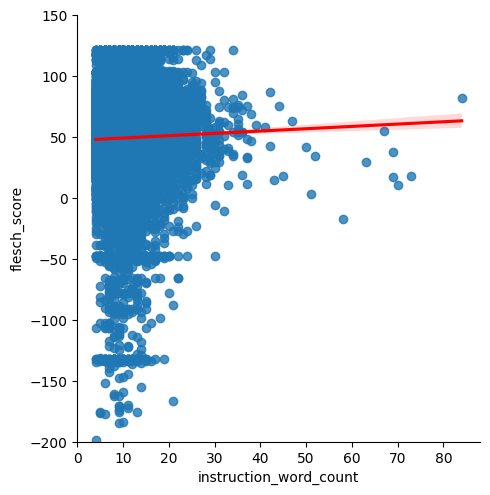

In [32]:
sns.lmplot(data = df , x = 'instruction_word_count' , y = "flesch_score" ,  line_kws = {"color": "red"})

## Plot data + add regression model on top of that..
## line_kws is used to control the appearance of the regression line)
plt.ylim(-200 , 150)

In [ ]:
'''

Now if u want to find eqn of line , u can use numpy :

'''

In [33]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'prompt_type', 'flesch_score',
       'readability_level', 'instruction_word_count'],
      dtype='object')

In [74]:
import numpy as np

# Fit a simple line: Price = m * Duration + c
m , c = np.polyfit(df["instruction_word_count"], df["flesch_score"], 1)

m


np.float64(0.1905013502187117)

In [75]:
c

np.float64(47.16478237136581)

In [ ]:
### lets cross check using co-relation :

In [ ]:
df['instruction_word_count'].corr(df['flesch_score'])

In [ ]:
'''

0.0217 ≈ 0

This means :
👉 There is almost NO relationship between prompt length and readability of GPT responses..

'''

In [91]:
px.scatter(
    df,
    x="instruction_word_count",
    y="flesch_score",
    title="Prompt Length vs Readability (Flesch Score)",
    opacity=0.5  , ## transprency level
    trendline="ols" ## OLS Draws the best-fit straight line between "instruction_word_count" & "flesch_score"
)


# 7.. How Verbose Are ChatGPT Responses ?

    🔹 Verbosity depends on length

    

    it means u have to compute : 
    2️⃣ How dense the language is → u have to compute "how many words per sentence"
    


In [ ]:
### show data , then plot  !

In [ ]:
'''
Explain Q1 , Q3
| **Q1 ≈ 10**          | 25% of responses have **fewer than ~10 sentences**                          |               |
| **Q3 = 21**          | 75% of responses have **fewer than 21 sentences**                           |               |


'''

In [40]:
df.columns

Index(['instruction', 'input', 'output', 'text', 'prompt_type', 'flesch_score',
       'readability_level', 'instruction_word_count'],
      dtype='object')

In [94]:
import re

In [159]:
def count_sentences(text):
    text = str(text)
    sentences = re.split(r'[.!?]+', text)   # Splits on " .!? " which are sentence-ending punctuation
    sentences = [s.strip() for s in sentences if s.strip()]  # remove empty parts
    return len(sentences)

# if s.strip() => “Keep this sentence only if it is NOT empty after removing spaces.”

In [160]:
df['sentence_count'] = df['output'].apply(count_sentences)

In [161]:
len(df["output"][0].split())

121

In [162]:
df['output_word_count'] = df['output'].astype(str).apply(lambda x: len(x.split())) ## Output Length

In [ ]:
df.columns

In [131]:
df['words_per_sentence'] = df['output_word_count'] / df['sentence_count']

In [132]:
df["words_per_sentence"]

0        12.100000
1        17.666667
2        19.000000
3        12.705882
4        21.000000
           ...    
51997    38.666667
51998     3.000000
51999    27.333333
52000    13.631579
52001    23.000000
Name: words_per_sentence, Length: 52002, dtype: float64

In [ ]:
df.columns

In [136]:
df[['output', 'sentence_count' , 'output_word_count' , 'words_per_sentence']]

,output,sentence_count,output_word_count,words_per_sentence
0,1. Eat a balanced and nutritious diet: Make su...,10,121,12.100000
1,"The three primary colors are red, blue, and ye...",3,53,17.666667
2,An atom is the basic building block of all mat...,11,209,19.000000
3,There are several ways to reduce air pollution...,17,216,12.705882
4,"As an AI assistant, I do not have my own perso...",4,84,21.000000


In [140]:
px.box(df , 
      y = 'words_per_sentences' , 
      title = "Distribution of words per sentence in ChatGPT response")

In [ ]:
'''



| Term                 | Value                                                                       | What It Means |
| -------------------- | --------------------------------------------------------------------------- | ------------- |
| **Median = 15**      | Half the responses have **15 or fewer sentences**, half have more           |               |
| **Q1 ≈ 10**          | 25% of responses have **fewer than ~10 sentences**                          |               |
| **Q3 = 21**          | 75% of responses have **fewer than 21 sentences**                           |               |
| **Upper fence = 38** | Responses with more than 38 sentences are considered **very long outliers** |               |



'''

In [ ]:
'''

📏 Most answers are medium length

The box (middle part) shows most responses fall between 10 and 21 sentences.
So typically, ChatGPT gives moderate-length explanations, not just 1–2 lines.


🚀 Many very long answers

The dots going far upward are outliers — very long responses..
These are likely:

    Detailed explanations
    Step-by-step guides
    Big lists



'''

# 8.. "Does Additional Context Improve ChatGPT Responses?"
   
        Evaluating How Context Affects ChatGPT Response Quality

In [ ]:
'''

Show example on chatgpt :

Explain regression
Explain regression for beginners using real life example 

'''

In [ ]:
## show output image 

In [ ]:
'''
🧠 Interpretation
✏️ 1️⃣ Response Length
        When no extra context is provided, ChatGPT gives longer responses (138 words on average).
        → ChatGPT may be guessing or explaining more to cover possibilities.

        When extra context is provided, responses become shorter and more focused (66 words).
        → ChatGPT understands the task better and gives a more focused answer.



📖 2️⃣ Readability (Ease of Reading)



        Responses with extra context are easier to read (score ≈ 53)
        Responses without context are slightly more complex (score ≈ 46)
        
        📌 Extra context helps ChatGPT produce clearer and simpler explanations.



'''

In [ ]:
df.head(1)

## we will pick input col now , as this col has context of Prompt !

In [103]:
df["input"]

0                                                     None
1                                                     None
2                                                     None
3                                                     None
4                                                     None
                               ...                        
51997                                                 None
51998                                     cake, me, eating
51999                                       Michelle Obama
52000                                                 None
52001    The following is an excerpt from a contract be...
Name: input, Length: 52002, dtype: object

In [ ]:
## None means no data is available or missing value or "blank" ( we will map it as 0) else 1

In [104]:
# Create a flag: 1 if input is present, else 0
df['has_input'] = df['input'].apply(lambda x: 0 if pd.isna(x) or str(x).strip()=="" else 1)

df['has_input'].value_counts()


has_input
0    31344
1    20658
Name: count, dtype: int64

In [ ]:
## show output image 

In [ ]:
df.columns

In [105]:
comparison = df.groupby('has_input')[['output_word_count', 'flesch_score']].mean().reset_index()
comparison

,has_input,output_word_count,flesch_score
0,0,138.464682,46.360011
1,1,66.018637,53.211817


In [124]:
comparison['Context'] = comparison['has_input'].map({0: "No Extra Context", 1: "Has Extra Context"})
comparison

,has_input,output_word_count,flesch_score,Context
0,0,138.464682,46.360011,No Extra Context
1,1,66.018637,53.211817,Has Extra Context


In [ ]:
## lets plot it above results usig groypued bar 

In [110]:

fig = px.bar(
    comparison,
    x='Context',
    y=['output_word_count', 'flesch_score'], ## For each prompt type, show two bars:
    barmode='group', ## bcz we want grouped bar 
    title="Effect of Extra Context on ChatGPT Responses" , 
    labels={ ## Renames things to be human-friendly:
        'value': 'Average Value',
        'variable': 'Metric',
        'Context': 'Prompt Type'
    }
)

fig

C:\Users\shant\anaconda3\envs\data_analysis\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [61]:
df.to_csv(r"R:\All_Datasets\ChatGPT/chatgpt_processed_data.csv" , index = False)

In [ ]:
!pip install streamlit

In [62]:

## 📌 Plotly Express internally uses statsmodels
!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ----------------------- ---------------- 5.5/9.5 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 22.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --